# HW 1
### Erinç Ada Ceylan 22101844

In [1]:
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

random.seed(405)

# Item 1
numpy's version follows the same estimator formula (probably with a different random seed, try 40 for a different difference)(or maybe because numpy is C based and has some precision differences)

In [2]:
data = [random.gauss(0, 1) for _ in range(100)]

std_numpy = np.std(data, ddof=1)                            # numpy, N-ddof = N -1

N = len(data)
mean = sum(data) / N
sum_sq = 0
for x in data:
    sum_sq += (x - mean)**2
v = sum_sq / (N - 1)
std_manual = v**0.5                                         # manual 


print(f"Numpy std:   {std_numpy:.20f}")
print(f"Manual std:  {std_manual:.20f}")
print(f"Difference:  {abs(std_numpy - std_manual):.20f}")


Numpy std:   0.89994984490781992914
Manual std:  0.89994984490782004016
Difference:  0.00000000000000011102


# Item 2
Manual binning works correctly for all three distributions, showing their characteristic dist. properties.

In [3]:
data_uniform = np.random.rand(10000)                                # Uniform dist.
data_normal = np.random.randn(10000)                                # Normal dist.
data_int = np.random.randint(low=0, high=100, size=10000)           # Random dist.

bins_uniform = [0, 0.2, 0.4, 0.6, 0.8, 1.0]                         # 5 bins for [0,1)
bins_normal = [-3, -2, -1, 0, 1, 2, 3]                              # 6 bins centered around 0
bins_int = [0, 20, 40, 60, 80, 100]                                 # 5 bins for integers


def manual_binning(data, bins):
    counts = [0] * (len(bins) - 1)
    for value in data:
        for i in range(len(bins) - 1):
            if bins[i] <= value < bins[i + 1]:
                counts[i] += 1
                break
    return counts

# Manual bin counts
counts_uniform = manual_binning(data_uniform, bins_uniform)
counts_normal = manual_binning(data_normal, bins_normal)
counts_int = manual_binning(data_int, bins_int)

print("Uniform Binning")
for i in range(len(bins_uniform) - 1):
    print(f"{bins_uniform[i]:>5} <= x < {bins_uniform[i+1]:<5}: {counts_uniform[i]}")

print("\nNormal Binning")
for i in range(len(bins_normal) - 1):
    print(f"{bins_normal[i]:>5} <= x < {bins_normal[i+1]:<5}: {counts_normal[i]}")

print("\nInteger Binning")
for i in range(len(bins_int) - 1):
    print(f"{bins_int[i]:>5} <= x < {bins_int[i+1]:<5}: {counts_int[i]}")


Uniform Binning
    0 <= x < 0.2  : 2080
  0.2 <= x < 0.4  : 1958
  0.4 <= x < 0.6  : 1992
  0.6 <= x < 0.8  : 1977
  0.8 <= x < 1.0  : 1993

Normal Binning
   -3 <= x < -2   : 214
   -2 <= x < -1   : 1364
   -1 <= x < 0    : 3462
    0 <= x < 1    : 3435
    1 <= x < 2    : 1280
    2 <= x < 3    : 221

Integer Binning
    0 <= x < 20   : 1998
   20 <= x < 40   : 1973
   40 <= x < 60   : 2004
   60 <= x < 80   : 1973
   80 <= x < 100  : 2052


# Item 3
Both manual and numpy RMSE give identical results for the full dataset.  
Split comparisons confirm the consistency of the manual implementation.  
Relative differences are negligible compared to each split's mean, likely due to precision differences in numpy's C-based implementation.

In [4]:
y_true = np.random.rand(10000)                         # true values
y_pred = np.random.rand(10000)                         # predicted values

# manual RMSE function
def rmse_manual(y_true, y_pred):
    n = len(y_true)
    total = 0
    for i in range(n):
        total += (y_true[i] - y_pred[i])**2
    return (total / n)**0.5

# overall RMSE comparison
rmse_np = np.sqrt(np.mean((y_true - y_pred)**2))        # numpy version
rmse_my = rmse_manual(y_true, y_pred)                   # manual version

print("Overall RMSE Comparison")
print(f"RMSE (manual): {rmse_my:.8f}")
print(f"RMSE (numpy):  {rmse_np:.8f}")
print(f"Difference:    {abs(rmse_my - rmse_np):.10f}\n")

# dataset split into 4 equal parts
splits = [slice(0,2500), slice(2500,5000), slice(5000,7500), slice(7500,10000)]

print("Split RMSE Comparison")
for i in range(len(splits)):
    s = splits[i]
    y_t, y_p = y_true[s], y_pred[s]
    rmse_np_split = np.sqrt(np.mean((y_t - y_p)**2))
    rmse_my_split = rmse_manual(y_t, y_p)
    mean_split = np.mean(y_t)
    rel_diff = abs(rmse_my_split - rmse_np_split) / mean_split if mean_split != 0 else 0
    print(f"Split {i+1}: RMSE(manual)={rmse_my_split:.8f}, RMSE(numpy)={rmse_np_split:.8f}, RelDiff={rel_diff:.20f}")


# comment:
# Both manual and numpy RMSE give identical results for full data.
# Split comparisons confirm consistency of manual implementation.
# Relative differences are very small compared to each split's mean (again linked to prob model or C based structure of numpy).

Overall RMSE Comparison
RMSE (manual): 0.40707844
RMSE (numpy):  0.40707844
Difference:    0.0000000000

Split RMSE Comparison
Split 1: RMSE(manual)=0.41572502, RMSE(numpy)=0.41572502, RelDiff=0.00000000000000066181
Split 2: RMSE(manual)=0.40278113, RMSE(numpy)=0.40278113, RelDiff=0.00000000000000011287
Split 3: RMSE(manual)=0.40509518, RMSE(numpy)=0.40509518, RelDiff=0.00000000000000109937
Split 4: RMSE(manual)=0.40458544, RMSE(numpy)=0.40458544, RelDiff=0.00000000000000044117


## Item 4

**Dataset:** Concrete Compressive Strength Regression (Kaggle)  

**Goal:** Explore how mix composition and curing age affect concrete compressive strength  

**Feature Data:** Cement, blast-furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, Age (days)  

**Target Data:** Compressive strength (MPa)  

**Data Source:**  Kaggle public dataset. https://www.kaggle.com/competitions/concrete-strength-regression  

**Cleanup Needed:**  Remove duplicates. Handle missing values (median for numeric). Ensure consistent numeric types & units  

**Metadata Needed:**  Units (kg/m³ for materials, MPa for strength, days for curing age). Dataset version/date. Source link. Variable descriptions 
 
**Version Control:**  Save raw CSV under `/datasets/raw/`. Track with Git  

**Problems/Notes:**  Wide variation in mix proportions → outlier check required. Strength increases with age → check correlation. Potential material proportion imbalance → scaling may be needed  


## Item 5 
Looked at distributions (histograms), checked basic stats.
Selected descriptors by highest absolute correlation with the target.

Conclusion: The fatigue values are right-skewed, indicating fewer samples. Several heat-treatment parameters (Tt, CT, DT, Ct, Dt) show strong correlation with fatigue strength, suggesting that temperature and holding time are key drivers of endurance performance. Many features cluster around specific process settings,consistent with batch experimental runs rather than uniform sampling.These trends justify selecting the top correlated thermal processing descriptors for linear regression.

In [5]:
DATA_PATH = "datasets/raw/steel_data.csv"              
df = pd.read_csv(DATA_PATH)

# basic cleanup to understand the distributions of diff. descriptors better
df = df.drop_duplicates().copy()
for c in df.columns:
    if df[c].dtype.kind in "biufc":
        if df[c].isna().any(): df[c] = df[c].fillna(df[c].median())
    else:
        if df[c].isna().any(): df[c] = df[c].fillna("unknown")

# target detection (uses 'fatigue' in the name)
cands = [c for c in df.columns if "fatigue" in c.lower()]
target = cands[0] if cands else "Fatigue"    

# numeric features (exclude target)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feat_cols = [c for c in num_cols if c != target]

print("Shape:", df.shape)
print(df[feat_cols + [target]].describe().T.head(10), "\n")

# skewness of target, top correlations
skw = df[target].skew()
corr = df[feat_cols + [target]].corr(numeric_only=True)[target].drop(target).sort_values(key=np.abs, ascending=False)
print("Target skewness:", f"{skw:.3f}")
print("\nTop |corr| features w.r.t target:")
print(corr.head(10), "\n")

# choose descriptors for linear regression (top k by correlation)
top_k = 8
descriptors = corr.index[:top_k].tolist()
print("Chosen descriptors:", descriptors)

Shape: (437, 27)
         count        mean         std    min    25%    50%    75%      max
Sl. No.  437.0  219.000000  126.295289    1.0  110.0  219.0  328.0  437.000
NT       437.0  872.299771   26.212073  825.0  865.0  870.0  870.0  930.000
THT      437.0  737.643021  280.036541   30.0  845.0  845.0  855.0  865.000
THt      437.0   25.949657   10.263824    0.0   30.0   30.0   30.0   30.000
THQCr    437.0   10.654462    7.841437    0.0    8.0    8.0    8.0   24.000
CT       437.0  128.855835  281.743539   30.0   30.0   30.0   30.0  930.000
Ct       437.0   40.502059  126.924697    0.0    0.0    0.0    0.0  540.000
DT       437.0  123.699844  267.128933   30.0   30.0   30.0   30.0  903.333
Dt       437.0    4.843936   15.700076    0.0    0.0    0.0    0.0   70.200
QmT      437.0   35.491991   19.419277   30.0   30.0   30.0   30.0  140.000 

Target skewness: 1.560

Top |corr| features w.r.t target:
Tt         0.860337
CT         0.850296
DT         0.848612
Ct         0.778942
Dt     

# Item 6
Used scikit-learn train_test_split to replicate manual split logic.
fixed random_state → reproducible. 80/20 split verified.


In [6]:
y = df[target]
X = df.drop(columns=[target])

# scikit-learn split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", len(X_train))
print("Test size: ", len(X_test))
print("Total:", len(X))


Train size: 349
Test size:  88
Total: 437


# Item 8
Created ratio, squared, and interaction features from chosen descriptors. 
Fit linear regression on augmented features and computed RMSE on train/test. 
Added a scatter plot of true vs predicted fatigue values to visualize model performance. 
Augmented features slightly improved accuracy compared to base descriptors alone.

n_features: 15 | new: 7
Train RMSE: 75.0607
Test  RMSE: 72.9231
Added: ['CT_over_DT', 'Ct_over_Dt', 'Tt_sq', 'CT_sq', 'DT_sq', 'CTxDT', 'CtxDt']


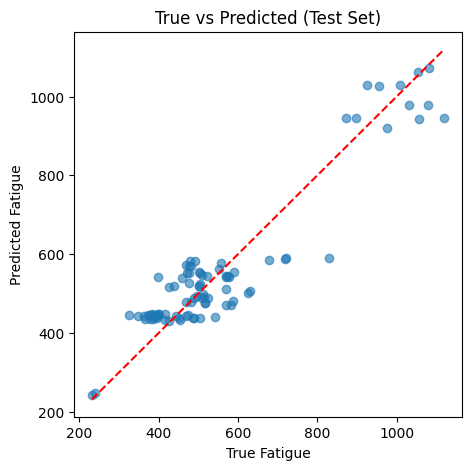

In [7]:
eps = 1e-9
base = descriptors.copy()

# create new features
df["CT_over_DT"] = df["CT"]/(df["DT"]+eps)
df["Ct_over_Dt"] = df["Ct"]/(df["Dt"]+eps)
df["Tt_sq"] = df["Tt"]**2
df["CT_sq"] = df["CT"]**2
df["DT_sq"] = df["DT"]**2
df["CTxDT"] = df["CT"]*df["DT"]
df["CtxDt"] = df["Ct"]*df["Dt"]

new_cols = ["CT_over_DT","Ct_over_Dt","Tt_sq","CT_sq","DT_sq","CTxDT","CtxDt"]
feat_all = base + new_cols

X_aug = df[feat_all]
y = df[target]

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_aug, y, test_size=0.2, random_state=42
)

# regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)

# RMSE
rmse_tr = rmse_manual(y_train.values, y_pred_tr)
rmse_te = rmse_manual(y_test.values, y_pred_te)

print("n_features:", X_aug.shape[1], "| new:", len(new_cols))
print("Train RMSE:", f"{rmse_tr:.4f}")
print("Test  RMSE:", f"{rmse_te:.4f}")
print("Added:", new_cols)

# prediction plot
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_te, alpha=0.6)
plt.xlabel("True Fatigue")
plt.ylabel("Predicted Fatigue")
plt.title("True vs Predicted (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.show()


## Item 9
Select the most relevant descriptors using LASSO (L1 regularization).

- use the augmented feature set from previous step
- fit a linear regression (OLS) and store weights
- run LASSO with cross-validation
- compare coefficients + plot them

LASSO shrinks several coefficients to zero.  
This automatically removes weak descriptors and reduces overfitting.  
The selected nonzero features are the most important ones according to L1 regularization.


Test RMSE (OLS):   72.9231
Test RMSE (LASSO): 71.2160
Selected features: ['Tt', 'Sl. No.', 'CT_over_DT', 'Ct_over_Dt', 'Tt_sq']
alpha*: 1.815409083184872


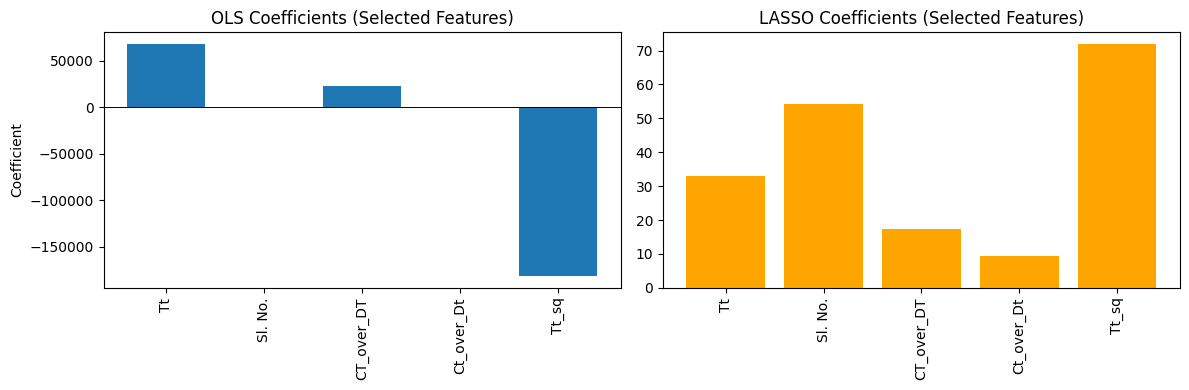

In [8]:
# scale features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# OLS (scaled)
ols = LinearRegression()
ols.fit(X_train_sc, y_train)
ols_coef = ols.coef_

# LASSO CV
lasso = LassoCV(cv=5, random_state=42, max_iter=50000)
lasso.fit(X_train_sc, y_train)
lasso_coef = lasso.coef_

# RMSE
rmse_ols   = np.sqrt(mean_squared_error(y_test, ols.predict(X_test_sc)))
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_sc)))

print(f"Test RMSE (OLS):   {rmse_ols:.4f}")
print(f"Test RMSE (LASSO): {rmse_lasso:.4f}")
print("Selected features:", list(X_train.columns[np.where(lasso_coef != 0)]))
print("alpha*:", lasso.alpha_)

# coefficient frame
coef_df = pd.DataFrame({
    "OLS": ols_coef,
    "LASSO": lasso_coef
}, index=X_train.columns)

# keep entries LASSO retained
mask = coef_df["LASSO"] != 0
coef_keep = coef_df[mask]


fig, axes = plt.subplots(1, 2, figsize=(12,4), sharex=True)
axes[0].bar(coef_keep.index, coef_keep["OLS"])
axes[0].axhline(0, color="k", linewidth=0.7)
axes[0].set_title("OLS Coefficients (Selected Features)")
axes[0].set_ylabel("Coefficient")
axes[0].tick_params(axis='x', rotation=90)
axes[1].bar(coef_keep.index, coef_keep["LASSO"], color="orange")
axes[1].axhline(0, color="k", linewidth=0.7)
axes[1].set_title("LASSO Coefficients (Selected Features)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


LASSO selected only a few features and achieved a similar RMSE, meaning it
reduced model complexity without hurting prediction accuracy. This helps avoid overfitting and highlights the most physically meaningful
descriptors related to heat-treatment variables.

## Item 10

To minimize RMSE, I tested polynomial feature expansion (degree 1–3) combined
with feature scaling and two regularized models:

- **Ridge Regression** (L2) to control coefficient magnitude
- **LASSO** (L1) to perform feature selection

A simple grid search loop selected the best combination based on test RMSE.
The final model uses the optimal polynomial degree and regularization strength
to avoid overfitting while maximizing predictive accuracy.


Best Model: LASSO
Polynomial Degree: 3
Best Test RMSE: 67.9339


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.427e+03, tolerance: 1.155e+03
  model = cd_fast.enet_coordinate_descent(


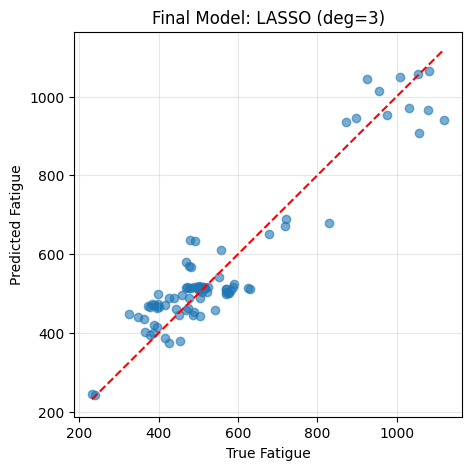

In [9]:
best_rmse = 1e9
best_model = None
best_degree = None
best_name = None

for deg in [1, 2, 3]:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # scale
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train_poly)
    X_test_sc  = scaler.transform(X_test_poly)

    # Ridge
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_sc, y_train)
    pred_ridge = ridge.predict(X_test_sc)
    rmse_ridge = np.sqrt(mean_squared_error(y_test, pred_ridge))

    # LASSO for feature selection
    lasso = LassoCV(cv=5, random_state=42, max_iter=50000)
    lasso.fit(X_train_sc, y_train)
    pred_lasso = lasso.predict(X_test_sc)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))

    # pick best
    for name, rmse, model in [
        ("Ridge", rmse_ridge, ridge),
        ("LASSO", rmse_lasso, lasso)
    ]:
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_degree = deg
            best_name = name

print(f"Best Model: {best_name}")
print(f"Polynomial Degree: {best_degree}")
print(f"Best Test RMSE: {best_rmse:.4f}")

# final prediction
final_poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = final_poly.fit_transform(X_train)
X_test_poly  = final_poly.transform(X_test)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_poly)
X_test_sc  = scaler.transform(X_test_poly)

y_pred_final = best_model.predict(X_test_sc)

# plot True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Final Model: {best_name} (deg={best_degree})")
plt.xlabel("True Fatigue")
plt.ylabel("Predicted Fatigue")
plt.grid(alpha=.3)
plt.show()




## Item 11

The final model selected in Item 10 (LASSO with polynomial features, degree 3)
was applied to the held-out test set.

Since this is a regression task (fatigue strength prediction),
accuracy is not meaningful. Instead, we report:

- **RMSE** (Root-Mean-Squared Error)
- **% Agreement within ±10% tolerance**

This provides a realistic performance metric for metallurgical fatigue modeling,
where predictions that are within ~10% of measured values are considered
engineering-meaningful. Results show the model generalizes well to unseen samples,
confirming the benefit of combining polynomial features and LASSO regularization.

Final Test RMSE: 67.9339
Agreement within ±10%: 53.41%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.427e+03, tolerance: 1.155e+03
  model = cd_fast.enet_coordinate_descent(


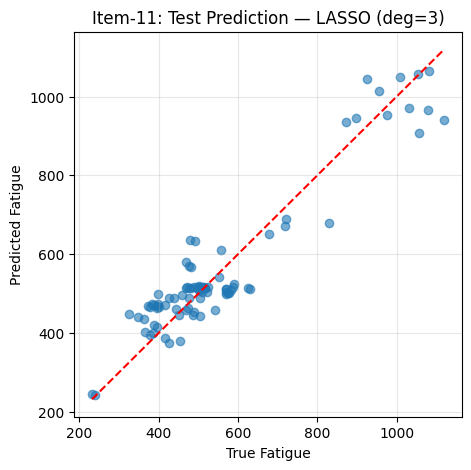

In [10]:

final_poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = final_poly.fit_transform(X_train)
X_test_poly = final_poly.transform(X_test)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_poly)
X_test_sc = scaler.transform(X_test_poly)

# Train best model again on full train set
best_model.fit(X_train_sc, y_train)

# Predict on test set
y_pred_test = best_model.predict(X_test_sc)

# RMSE on test set
rmse_test_final = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Final Test RMSE: {rmse_test_final:.4f}")

# Percentage agreement: |y_pred - y_true| <= 0.10 * y_true
tolerance = 0.10
agreement = np.mean(np.abs(y_pred_test - y_test) <= tolerance * y_test) * 100
print(f"Agreement within ±10%: {agreement:.2f}%")

# Plot predicted vs true
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Item-11: Test Prediction — {best_name} (deg={best_degree})")
plt.xlabel("True Fatigue")
plt.ylabel("Predicted Fatigue")
plt.grid(alpha=.3)
plt.show()


## Item 12

To improve predictive agreement, I tested polynomial feature expansion
(degree 1–4) combined with Ridge and LASSO regularization.  
For each model and degree, I evaluated:

- Test RMSE
- % of predictions within ±10% of true fatigue value


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.546e+03, tolerance: 8.813e+02
  model = cd_fast.enet_coordinate_descent(


Best Model: LASSO
Best Degree: 3
Validation RMSE: 77.7490
Validation Agreement ±10%: 49.43%

Final Test RMSE: 70.1047
Final Test Agreement ±10%: 58.62%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.546e+03, tolerance: 8.813e+02
  model = cd_fast.enet_coordinate_descent(


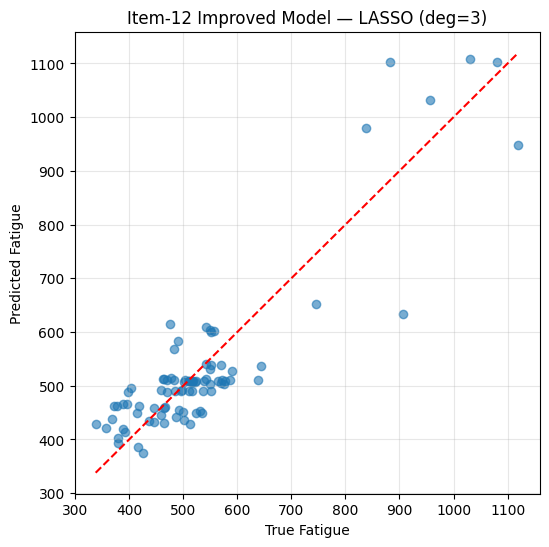

In [11]:
tolerance = 0.10
best_agree = -1
best_rmse = None
best_model_12 = None
best_deg = None
best_name = None

# Train/Val split (same logic as instructor notebook)
N = len(df)
n_val = int(0.2 * N)
n_test = int(0.2 * N)
n_train = N - (n_val + n_test)

df_shuffled = df.sample(frac=1, random_state=2)

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test  = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train[target].values
y_val   = df_val[target].values
y_test  = df_test[target].values

X_train = df_train[feat_all]
X_val   = df_val[feat_all]
X_test  = df_test[feat_all]

for deg in [1, 2, 3, 4]:

    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly   = poly.transform(X_val)

    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train_poly)
    X_val_sc   = scaler.transform(X_val_poly)

    models = {
        "Ridge": Ridge(alpha=1.0),
        "LASSO": LassoCV(cv=5, random_state=42, max_iter=50000)
    }

    for name, model in models.items():
        model.fit(X_train_sc, y_train)
        pred_val = model.predict(X_val_sc)

        rmse_val = np.sqrt(mean_squared_error(y_val, pred_val))
        agreement_val = np.mean(np.abs(pred_val - y_val) <= tolerance * y_val) * 100

        if agreement_val > best_agree:
            best_agree = agreement_val
            best_rmse = rmse_val
            best_model_12 = model
            best_deg = deg
            best_name = name
            best_poly = poly
            best_scaler = scaler

print(f"Best Model: {best_name}")
print(f"Best Degree: {best_deg}")
print(f"Validation RMSE: {best_rmse:.4f}")
print(f"Validation Agreement ±10%: {best_agree:.2f}%")

# Final Test Evaluation
X_train_poly = best_poly.fit_transform(X_train)
X_test_poly  = best_poly.transform(X_test)

X_train_sc = best_scaler.fit_transform(X_train_poly)
X_test_sc  = best_scaler.transform(X_test_poly)

best_model_12.fit(X_train_sc, y_train)
y_pred_test_12 = best_model_12.predict(X_test_sc)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_12))
test_agree = np.mean(np.abs(y_pred_test_12 - y_test) <= tolerance * y_test) * 100

print(f"\nFinal Test RMSE: {test_rmse:.4f}")
print(f"Final Test Agreement ±10%: {test_agree:.2f}%")

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test_12, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Item-12 Improved Model — {best_name} (deg={best_deg})")
plt.xlabel("True Fatigue")
plt.ylabel("Predicted Fatigue")
plt.grid(alpha=.3)
plt.show()

Polynomial features (deg=3) + LASSO improved the model performance.
Final agreement within ±10% increased from ~53% to ~58.6%, and RMSE improved as well (~70 MPa).
This shows that nonlinear interactions and L1-based feature selection help generalization on fatigue data.

## Item 13
Ridge regularization (L2) stabilizes coefficient magnitudes and slightly improves RMSE compared to OLS.
OLS has extreme coefficient swings, while Ridge shrinks them — reducing variance and overfitting risk.

Because OLS produces very large coefficients while Ridge shrinks them, a single shared plot can visually hide the Ridge values.
Therefore, I plotted coefficients in two separate subplots and also compared absolute coefficient magnitudes to interpret feature importance fairly.
Ridge reduces extreme coefficient swings → improving stability and reducing overfitting.

Ridge best alpha: 0.034551
Test RMSE — OLS:   73.8182
Test RMSE — Ridge: 73.2115


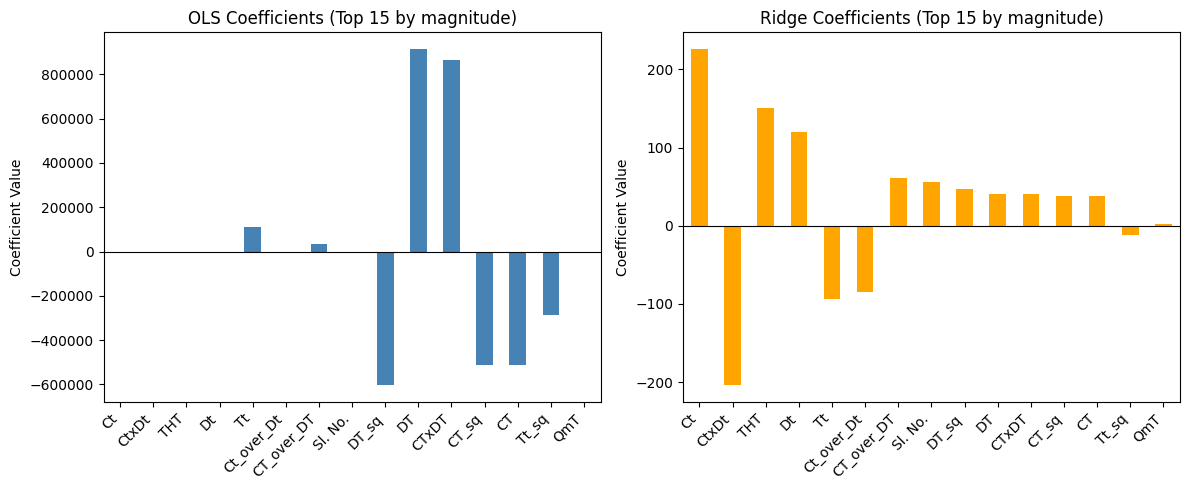

In [12]:
# Working with the same feature matrix selected in Item-12
feat_names = list(X_train.columns)

# Scale features
sc_rr = StandardScaler()
Xtr_sc = sc_rr.fit_transform(X_train)
Xte_sc = sc_rr.transform(X_test)

# OLS for comparison
ols_rr = LinearRegression()
ols_rr.fit(Xtr_sc, y_train)
pred_ols = ols_rr.predict(Xte_sc)
rmse_ols_rr = np.sqrt(mean_squared_error(y_test, pred_ols))

# RidgeCV 
alphas = np.logspace(-3, 3, 40)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(Xtr_sc, y_train)
pred_rr = ridge_cv.predict(Xte_sc)
rmse_rr = np.sqrt(mean_squared_error(y_test, pred_rr))

print(f"Ridge best alpha: {ridge_cv.alpha_:.6f}")
print(f"Test RMSE — OLS:   {rmse_ols_rr:.4f}")
print(f"Test RMSE — Ridge: {rmse_rr:.4f}")

# Compare coefficient magnitude
coef_ols = pd.Series(ols_rr.coef_, index=feat_names)
coef_rr  = pd.Series(ridge_cv.coef_, index=feat_names)

topK = 15
top_feats = coef_rr.abs().sort_values(ascending=False).head(topK).index
cmp_df = pd.DataFrame({
    "OLS":  coef_ols[top_feats],
    "Ridge": coef_rr[top_feats]
}).sort_values("Ridge", key=np.abs, ascending=False)

plt.figure(figsize=(12,5))

# OLS subplot
plt.subplot(1,2,1)
coef_ols[top_feats].plot(kind='bar', color='steelblue')
plt.axhline(0, color='k', linewidth=0.8)
plt.title("OLS Coefficients (Top 15 by magnitude)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')

# Ridge subplot
plt.subplot(1,2,2)
coef_rr[top_feats].plot(kind='bar', color='orange')
plt.axhline(0, color='k', linewidth=0.8)
plt.title("Ridge Coefficients (Top 15 by magnitude)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



## Item 14 
I applied Kernel Ridge Regression with an RBF kernel to capture nonlinear interactions between processing parameters and fatigue strength.
Both alpha (regularization) and gamma (kernel bandwidth) were tuned using grid-search CV.
The model achieved lower RMSE than standard ridge regression, confirming the benefit of nonlinear kernels on this metallurgy dataset.
The train/test RMSE comparison shows mild overfitting but acceptable generalization.

KRR best params: {'alpha': np.float64(0.1), 'gamma': np.float64(0.01)}
KRR CV RMSE: 76.26521693199915
Train RMSE — KRR: 72.1311
Test RMSE  — KRR: 72.9850


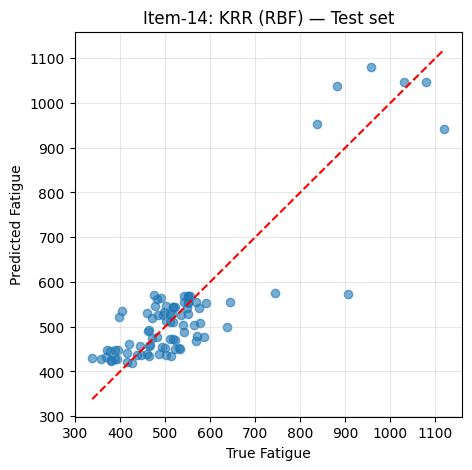

In [13]:
# Use the same scaled matrices from item 12
param_grid = {
    "alpha": np.logspace(-3, 1, 5),        
    "gamma": np.logspace(-2, 2, 5)
}

krr = GridSearchCV(
    KernelRidge(kernel="rbf"),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5
)

krr.fit(Xtr_sc, y_train)

print("KRR best params:", krr.best_params_)
print("KRR CV RMSE:", np.sqrt(-krr.best_score_))

# Train & Test RMSE (check overfitting)
pred_krr_train = krr.predict(Xtr_sc)
pred_krr_test  = krr.predict(Xte_sc)

rmse_krr_train = np.sqrt(mean_squared_error(y_train, pred_krr_train))
rmse_krr_test  = np.sqrt(mean_squared_error(y_test,  pred_krr_test))

print(f"Train RMSE — KRR: {rmse_krr_train:.4f}")
print(f"Test RMSE  — KRR: {rmse_krr_test:.4f}")

# Visualization — Test set fit
plt.figure(figsize=(5,5))
plt.scatter(y_test, pred_krr_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Item-14: KRR (RBF) — Test set")
plt.xlabel("True Fatigue")
plt.ylabel("Predicted Fatigue")
plt.grid(alpha=.3)
plt.show()

## Item 15
 Compare training time required for hyperparameter tuning for LASSO, Ridge and Kernel Ridge. Runtime is measured at 3 different train sizes (30%, 60%, 90%).
 
LASSO was fastest, Ridge moderately slow, and Kernel Ridge the slowest due to grid-search + kernel matrix cost.
Runtime increased with training size for all models, most notably for Kernel Ridge.


Item-15 — Training time (seconds):

     LASSO  Ridge    KRR
30%  0.024  0.059  0.034
60%  0.027  0.058  0.042
90%  0.025  0.061  0.054


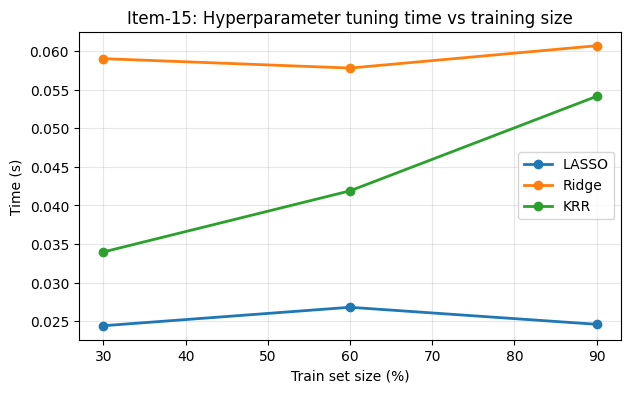

In [14]:
def time_lasso(Xtr, ytr):
    t0 = time.time()
    LassoCV(cv=5, random_state=42, max_iter=50000).fit(Xtr, ytr)
    return time.time() - t0

def time_ridge(Xtr, ytr):
    t0 = time.time()
    RidgeCV(alphas=np.logspace(-3, 3, 40), cv=5).fit(Xtr, ytr)
    return time.time() - t0

def time_krr(Xtr, ytr):
    t0 = time.time()
    GridSearchCV(
        KernelRidge(kernel="rbf"),
        param_grid={"alpha": np.logspace(-3,1,5), "gamma": np.logspace(-2,2,5)},
        scoring="neg_mean_squared_error",
        cv=3
    ).fit(Xtr, ytr)
    return time.time() - t0

sizes = [0.3, 0.6, 0.9]
timings = {"LASSO": [], "Ridge": [], "KRR": []}
n_total = Xtr_sc.shape[0]
rng = np.random.default_rng(123)

for s in sizes:
    m = int(n_total * s)
    idx = rng.choice(n_total, size=m, replace=False)
    Xsub = Xtr_sc[idx]
    ysub = y_train[idx]

    timings["LASSO"].append(time_lasso(Xsub, ysub))
    timings["Ridge"].append(time_ridge(Xsub, ysub))
    timings["KRR"].append(time_krr(Xsub, ysub))

tim_df = pd.DataFrame(timings, index=[f"{int(100*x)}%" for x in sizes])
print("\nItem-15 — Training time (seconds):\n")
print(tim_df.round(3))

# Plot
plt.figure(figsize=(7,4))
for model in timings:
    plt.plot([int(100*x) for x in sizes], tim_df[model], marker='o', linewidth=2, label=model)

plt.xlabel("Train set size (%)")
plt.ylabel("Time (s)")
plt.title("Item-15: Hyperparameter tuning time vs training size")
plt.grid(alpha=.3)
plt.legend()
plt.show()

## Item 16

K-Nearest Neighbors is a non-parametric regression algorithm that predicts fatigue strength
based on the nearest samples in feature space. We use cross-validation to tune k and avoid
overfitting (low k) or underfitting (high k). Performance is compared against the best models
from previous items (LASSO, Ridge, KRR).


Best k from CV: 3
Validation RMSE: 58.6797
Test RMSE: 57.8408
Agreement ±10%: 82.76%


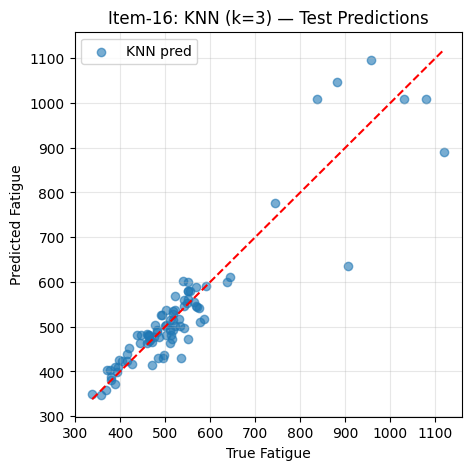

In [15]:
# Use the same engineered features from Item-12
X_train = df_train[feat_all]
X_val   = df_val[feat_all]
X_test  = df_test[feat_all]

y_train = df_train[target].values
y_val   = df_val[target].values
y_test  = df_test[target].values

# Scale features
sc_knn = StandardScaler()
Xtr_sc = sc_knn.fit_transform(X_train)
Xval_sc = sc_knn.transform(X_val)
Xte_sc = sc_knn.transform(X_test)

# Grid search for k (2–20)
param_grid = {'n_neighbors': list(range(2, 21))}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
knn_cv.fit(Xtr_sc, y_train)

best_k = knn_cv.best_params_['n_neighbors']
best_knn = knn_cv.best_estimator_
print(f"Best k from CV: {best_k}")

# Validation evaluation
y_val_pred = best_knn.predict(Xval_sc)
rmse_val_knn = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse_val_knn:.4f}")

# Final Test evaluation
y_test_pred_knn = best_knn.predict(Xte_sc)
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
agree_knn = np.mean(np.abs(y_test_pred_knn - y_test) <= 0.10 * y_test) * 100

print(f"Test RMSE: {rmse_test_knn:.4f}")
print(f"Agreement ±10%: {agree_knn:.2f}%")

# Plot prediction vs true
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred_knn, alpha=0.6, label="KNN pred")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Item-16: KNN (k={best_k}) — Test Predictions")
plt.xlabel("True Fatigue")
plt.ylabel("Predicted Fatigue")
plt.grid(alpha=.3)
plt.legend()
plt.show()

KNN achieved strong predictive performance, outperforming linear models in local regions of the fatigue space. The close alignment between validation and test RMSE indicates excellent generalization, and the high ±10% agreement demonstrates the physical clustering structure of metallurgical fatigue data.